In [1]:
#!pip install pandas
#!pip install matplotlib
#!pip install scikit-learn
#!pip install seaborn
#!pip install numpy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
import seaborn as sns

In [3]:
plt.style.use('ggplot')

In [4]:
train = pd.read_csv("/home/sinergia/Documents/pandas_exercises/classification/titanic/train.csv")
test = pd.read_csv("//home/sinergia/Documents/pandas_exercises/classification/titanic/test.csv")

# Analysis

In [5]:
train.shape

(891, 12)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
test.Age.astype(float)

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

In [16]:
test.shape

(418, 11)

In [17]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Imputation

In [18]:
#train["Survived"].replace({1:True, 0:False}, inplace=True)

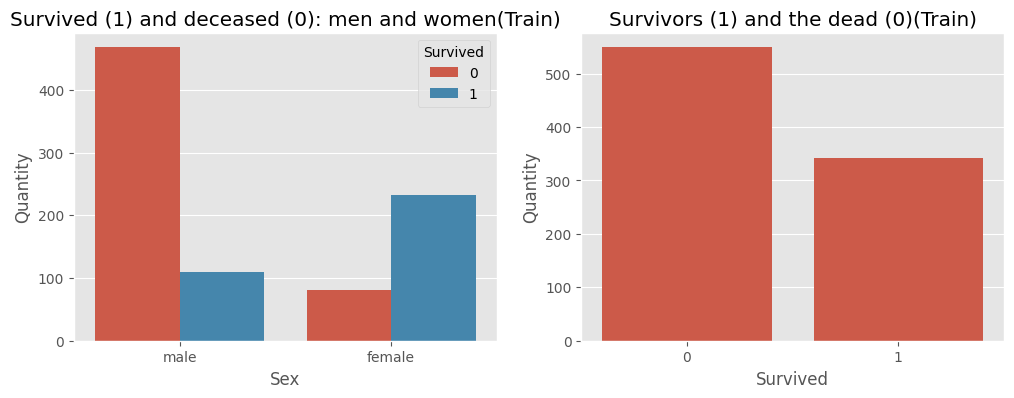

In [19]:
f, ax = plt.subplots(1, 2, figsize=(12, 4)) 

sns.countplot(x='Sex', hue='Survived', data=train, ax=ax[0]) 
ax[0].set_ylabel('Quantity') 
ax[0].set_title('Survived (1) and deceased (0): men and women(Train)') 

sns.countplot(x="Survived", data=train, ax=ax[1])
ax[1].set_ylabel('Quantity') 
ax[1].set_title('Survivors (1) and the dead (0)(Train)') 
plt.show() 

In [20]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [21]:
train["Cabin"].fillna('Unknown', inplace=True)
train["Embarked"].fillna('Unknown', inplace=True)
test["Embarked"].fillna('Unknown', inplace=True)
train.drop(columns=['Cabin','Fare'], inplace=True)
test.drop(columns=["Cabin","Fare"], inplace=True)
#train["Age"].fillna(train["Age"].mean(), inplace=True)
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [22]:
bins = [0,30, 60,np.inf]
names = ['<30', '30-60', '60+']
train['Age'] = pd.cut(train['Age'], bins, labels=names)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,<30,1,0,A/5 21171,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,30-60,1,0,PC 17599,C
2,3,1,3,"Heikkinen, Miss. Laina",female,<30,0,0,STON/O2. 3101282,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,30-60,1,0,113803,S
4,5,0,3,"Allen, Mr. William Henry",male,30-60,0,0,373450,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,<30,0,0,211536,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,<30,0,0,112053,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,<30,1,2,W./C. 6607,S
889,890,1,1,"Behr, Mr. Karl Howell",male,<30,0,0,111369,C


In [23]:
test['Age'] = pd.cut(test['Age'], bins, labels=names)
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked
0,892,3,"Kelly, Mr. James",male,30-60,0,0,330911,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,30-60,1,0,363272,S
2,894,2,"Myles, Mr. Thomas Francis",male,60+,0,0,240276,Q
3,895,3,"Wirz, Mr. Albert",male,<30,0,0,315154,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,<30,1,1,3101298,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30-60,0,0,A.5. 3236,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,30-60,0,0,PC 17758,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,30-60,0,0,SOTON/O.Q. 3101262,S
416,1308,3,"Ware, Mr. Frederick",male,30-60,0,0,359309,S


In [24]:
train2 = pd.get_dummies(train,columns=["Sex","Pclass","SibSp","Embarked","Age"])
train2.columns

Index(['PassengerId', 'Survived', 'Name', 'Parch', 'Ticket', 'Sex_female',
       'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'SibSp_0', 'SibSp_1',
       'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Embarked_Unknown', 'Age_<30', 'Age_30-60',
       'Age_60+'],
      dtype='object')

In [25]:
train2.head()
train2.shape

(891, 24)

In [26]:
test2 = pd.get_dummies(test,columns=["Sex","Pclass","SibSp","Embarked","Age"])
test2.columns

Index(['PassengerId', 'Name', 'Parch', 'Ticket', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'SibSp_0', 'SibSp_1', 'SibSp_2',
       'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Age_<30', 'Age_30-60', 'Age_60+'],
      dtype='object')

In [27]:
test2.shape

(418, 22)

## Into train and test dataset

In [28]:
X = train2[['PassengerId','Pclass_1', 'Pclass_2','Sex_female', 'Sex_male','Age_<30', 'Age_30-60',
       'Age_60+','Pclass_1', 'Pclass_2', 'Pclass_3', 'SibSp_0',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_Unknown','Parch']]
Y=train2["Survived"]

In [29]:
X

,PassengerId,Pclass_1,Pclass_2,Sex_female,Sex_male,Age_<30,Age_30-60,Age_60+,Pclass_1,Pclass_2,...,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown,Parch
0,1,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,0
1,2,True,False,True,False,False,True,False,True,False,...,False,False,False,False,False,True,False,False,False,0
2,3,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,0
3,4,True,False,True,False,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,0
4,5,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,False,True,False,True,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,0
887,888,True,False,True,False,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,0
888,889,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,2
889,890,True,False,False,True,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,0


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [31]:
Y_train

301    1
309    1
516    1
120    0
570    1
      ..
715    0
767    0
72     0
235    0
37     0
Name: Survived, Length: 712, dtype: int64

In [32]:
X_test

,PassengerId,Pclass_1,Pclass_2,Sex_female,Sex_male,Age_<30,Age_30-60,Age_60+,Pclass_1,Pclass_2,...,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown,Parch
862,863,True,False,True,False,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,0
223,224,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,0
84,85,False,True,True,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,0
680,681,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
535,536,False,True,True,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,797,True,False,True,False,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,0
815,816,True,False,False,True,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,0
629,630,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
421,422,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0


In [33]:
X_train.describe()

,PassengerId,Parch
count,712.000000,712.000000
mean,442.119382,0.370787
std,252.907306,0.775968
min,1.000000,0.000000
25%,225.750000,0.000000
50%,442.500000,0.000000
75%,657.250000,0.000000
max,891.000000,6.000000


In [34]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Encoding

In [35]:
X

,PassengerId,Pclass_1,Pclass_2,Sex_female,Sex_male,Age_<30,Age_30-60,Age_60+,Pclass_1,Pclass_2,...,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown,Parch
0,1,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,0
1,2,True,False,True,False,False,True,False,True,False,...,False,False,False,False,False,True,False,False,False,0
2,3,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,0
3,4,True,False,True,False,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,0
4,5,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,False,True,False,True,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,0
887,888,True,False,True,False,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,0
888,889,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,2
889,890,True,False,False,True,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,0


In [36]:
train2.columns

Index(['PassengerId', 'Survived', 'Name', 'Parch', 'Ticket', 'Sex_female',
       'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'SibSp_0', 'SibSp_1',
       'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Embarked_Unknown', 'Age_<30', 'Age_30-60',
       'Age_60+'],
      dtype='object')

In [37]:
train2.columns

Index(['PassengerId', 'Survived', 'Name', 'Parch', 'Ticket', 'Sex_female',
       'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'SibSp_0', 'SibSp_1',
       'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Embarked_Unknown', 'Age_<30', 'Age_30-60',
       'Age_60+'],
      dtype='object')

In [38]:
train2

,PassengerId,Survived,Name,Parch,Ticket,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,...,SibSp_4,SibSp_5,SibSp_8,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown,Age_<30,Age_30-60,Age_60+
0,1,0,"Braund, Mr. Owen Harris",0,A/5 21171,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,PC 17599,True,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,3,1,"Heikkinen, Miss. Laina",0,STON/O2. 3101282,True,False,False,False,True,...,False,False,False,False,False,True,False,True,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,113803,True,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
4,5,0,"Allen, Mr. William Henry",0,373450,False,True,False,False,True,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",0,211536,False,True,False,True,False,...,False,False,False,False,False,True,False,True,False,False
887,888,1,"Graham, Miss. Margaret Edith",0,112053,True,False,True,False,False,...,False,False,False,False,False,True,False,True,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",2,W./C. 6607,True,False,False,False,True,...,False,False,False,False,False,True,False,True,False,False
889,890,1,"Behr, Mr. Karl Howell",0,111369,False,True,True,False,False,...,False,False,False,True,False,False,False,True,False,False


In [39]:
test2.columns

Index(['PassengerId', 'Name', 'Parch', 'Ticket', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'SibSp_0', 'SibSp_1', 'SibSp_2',
       'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Age_<30', 'Age_30-60', 'Age_60+'],
      dtype='object')

In [40]:
X_test

,PassengerId,Pclass_1,Pclass_2,Sex_female,Sex_male,Age_<30,Age_30-60,Age_60+,Pclass_1,Pclass_2,...,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown,Parch
862,863,True,False,True,False,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,0
223,224,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,0
84,85,False,True,True,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,0
680,681,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
535,536,False,True,True,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,797,True,False,True,False,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,0
815,816,True,False,False,True,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,0
629,630,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
421,422,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0


In [41]:
X.shape

(891, 23)

In [42]:
X_test.shape

(179, 23)

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
X_test

,PassengerId,Pclass_1,Pclass_2,Sex_female,Sex_male,Age_<30,Age_30-60,Age_60+,Pclass_1,Pclass_2,...,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown,Parch
862,863,True,False,True,False,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,0
223,224,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,0
84,85,False,True,True,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,0
680,681,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
535,536,False,True,True,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,797,True,False,True,False,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,0
815,816,True,False,False,True,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,0
629,630,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
421,422,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0


In [45]:
sc = StandardScaler()
X = sc.fit_transform(X)
x_test = sc.fit_transform(X_test)

In [46]:
X

array([[-1.73010796, -0.56568542, -0.51015154, ...,  0.61930636,
        -0.0474312 , -0.47367361],
       [-1.72622007,  1.76776695, -0.51015154, ..., -1.61470971,
        -0.0474312 , -0.47367361],
       [-1.72233219, -0.56568542, -0.51015154, ...,  0.61930636,
        -0.0474312 , -0.47367361],
       ...,
       [ 1.72233219, -0.56568542, -0.51015154, ...,  0.61930636,
        -0.0474312 ,  2.00893337],
       [ 1.72622007,  1.76776695, -0.51015154, ..., -1.61470971,
        -0.0474312 , -0.47367361],
       [ 1.73010796, -0.56568542, -0.51015154, ..., -1.61470971,
        -0.0474312 , -0.47367361]])

In [47]:
len(Y)

891

# K - Nearest Neighbor

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [49]:
X_train.shape

(712, 23)

In [50]:
X_train.columns

Index(['PassengerId', 'Pclass_1', 'Pclass_2', 'Sex_female', 'Sex_male',
       'Age_<30', 'Age_30-60', 'Age_60+', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5',
       'SibSp_8', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_Unknown',
       'Parch'],
      dtype='object')

In [51]:
X_test

,PassengerId,Pclass_1,Pclass_2,Sex_female,Sex_male,Age_<30,Age_30-60,Age_60+,Pclass_1,Pclass_2,...,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown,Parch
862,863,True,False,True,False,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,0
223,224,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,0
84,85,False,True,True,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,0
680,681,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
535,536,False,True,True,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,797,True,False,True,False,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,0
815,816,True,False,False,True,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,0
629,630,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
421,422,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0


In [52]:
acc = []
for i in range(1,22):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    yhat = knn.predict(X_test)
    acc.append(accuracy_score(Y_test,yhat))
    print("For k = ",i," : ",accuracy_score(Y_test,yhat))

For k =  1  :  0.6201117318435754
For k =  2  :  0.6145251396648045
For k =  3  :  0.6201117318435754
For k =  4  :  0.6145251396648045
For k =  5  :  0.5977653631284916
For k =  6  :  0.6033519553072626
For k =  7  :  0.5698324022346368
For k =  8  :  0.5810055865921788
For k =  9  :  0.5810055865921788
For k =  10  :  0.5642458100558659
For k =  11  :  0.5642458100558659
For k =  12  :  0.5810055865921788
For k =  13  :  0.5698324022346368
For k =  14  :  0.5754189944134078
For k =  15  :  0.5865921787709497
For k =  16  :  0.5810055865921788
For k =  17  :  0.5810055865921788
For k =  18  :  0.5865921787709497
For k =  19  :  0.5921787709497207
For k =  20  :  0.5921787709497207
For k =  21  :  0.5865921787709497


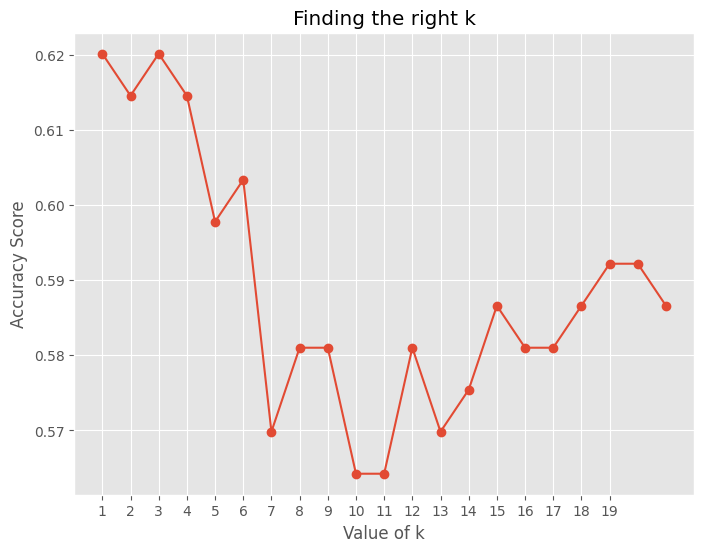

In [53]:
plt.figure(figsize=(8,6))
plt.plot(range(1,22),acc, marker = "o")
plt.xlabel("Value of k")
plt.ylabel("Accuracy Score")
plt.title("Finding the right k")
plt.xticks(range(1,20))
plt.show()

In [54]:
# Preferred K value with accuracy 3

KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X,Y)
y_pred = KNN.predict(X_test)
df_KNN = pd.DataFrame()
df_KNN["PassengerId"] = X_test["PassengerId"]
df_KNN["Survived"] = y_pred

/home/sinergia/Documents/pandas_exercises/classification/venv/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


df_KNN

In [55]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1])

In [56]:
len(test)

418

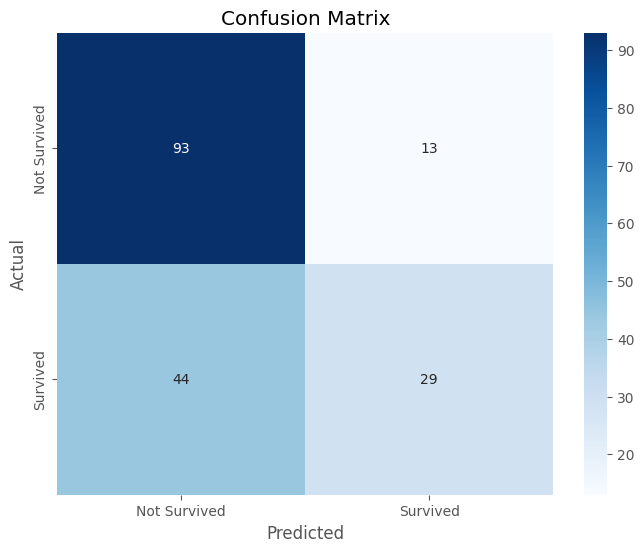

In [57]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [58]:
accu_KNN = accuracy_score(Y_test, y_pred)
accu_KNN

0.6815642458100558

In [59]:
from sklearn.metrics import f1_score, precision_score, recall_score

f1 = f1_score(Y_test, yhat)
precision = precision_score(Y_test, yhat)
recall = recall_score(Y_test, yhat)

print("F1-Score: ",f1,' Precision: ',precision,' Recall: ',recall)

F1-Score:  0.15909090909090906  Precision:  0.4666666666666667  Recall:  0.0958904109589041


In [61]:
knn.

array(['PassengerId', 'Pclass_1', 'Pclass_2', 'Sex_female', 'Sex_male',
       'Age_<30', 'Age_30-60', 'Age_60+', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Embarked_Unknown', 'Parch'], dtype=object)

# Decision Tree Algorithm

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
depth = []

for i in range(1,8):
    clf_tree = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=i)
    clf_tree.fit(X_train, Y_train)
    yhat_tree = clf_tree.predict(X_test)
    depth.append(accuracy_score(Y_test,yhat_tree))
    print("For max_depth=",i," accuracy: ",accuracy_score(Y_test, yhat_tree))

For max_depth= 1  accuracy:  0.776536312849162
For max_depth= 2  accuracy:  0.7430167597765364
For max_depth= 3  accuracy:  0.770949720670391
For max_depth= 4  accuracy:  0.7597765363128491
For max_depth= 5  accuracy:  0.7653631284916201
For max_depth= 6  accuracy:  0.7430167597765364
For max_depth= 7  accuracy:  0.7653631284916201


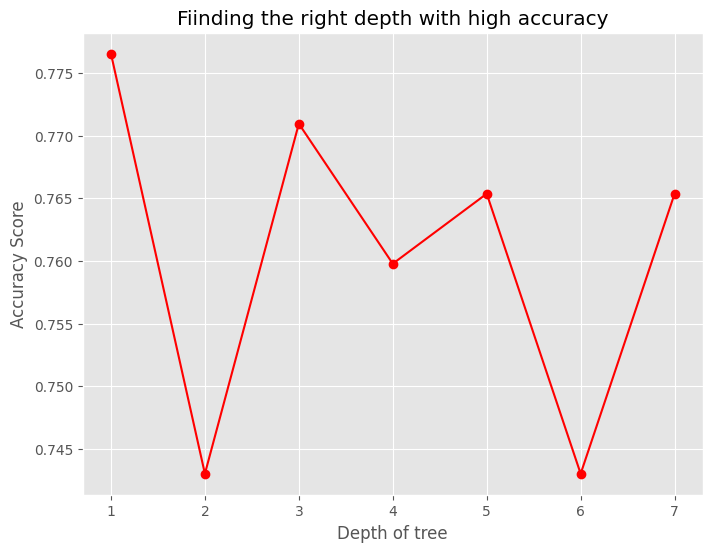

In [64]:
plt.figure(figsize=(8,6))
plt.plot(range(1,8),depth,color="red",marker="o")
plt.xlabel("Depth of tree")
plt.ylabel("Accuracy Score")
plt.title("Fiinding the right depth with high accuracy")
plt.show()

In [65]:
#Highest accuracy obtained with depth = 1

clf_tr=DecisionTreeClassifier(criterion="entropy",random_state=100, max_depth=1)
clf_tr.fit(X,Y)
pred_tree = clf_tr.predict(X_test)

df_TREE = pd.DataFrame()
df_TREE["PassengerId"] = X_test["PassengerId"]
df_TREE["Survived"] = pred_tree
df_TREE

/home/sinergia/.local/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


,PassengerId,Survived
862,863,1
223,224,0
84,85,1
680,681,1
535,536,1
...,...,...
796,797,1
815,816,0
629,630,0
421,422,0


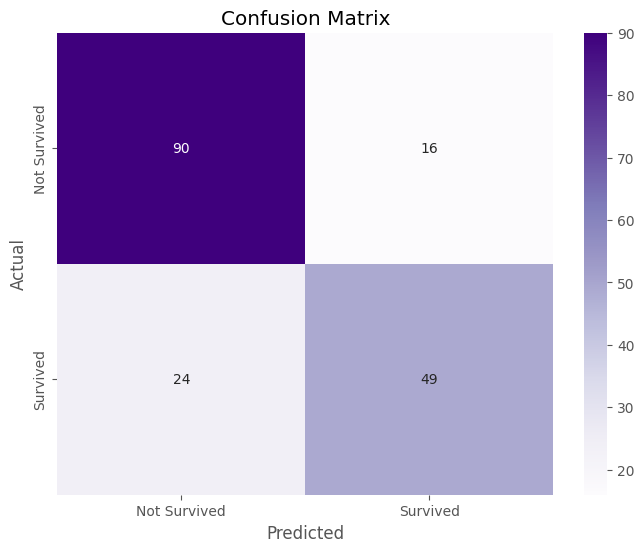

In [67]:
from sklearn.metrics import confusion_matrix


cm_tree = confusion_matrix(Y_test, pred_tree)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Purples", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [68]:
accu_tree = accuracy_score(Y_test, pred_tree)
accu_tree

0.776536312849162

In [69]:
from sklearn.metrics import f1_score, precision_score, recall_score

f1 = f1_score(Y_test, yhat_tree)
precision = precision_score(Y_test, yhat_tree)
recall = recall_score(Y_test, yhat_tree)

print("F1-Score: ",f1,' Precision: ',precision,' Recall: ',recall)

F1-Score:  0.676923076923077  Precision:  0.7719298245614035  Recall:  0.6027397260273972


# Random Forest Algorithm

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
clf_forest = RandomForestClassifier()
clf_forest.fit(X_train,Y_train)
yhat_forest = clf_forest.predict(X_test)
print("Accuracy for training data: ",accuracy_score(Y_test,yhat_forest))

Accuracy for training data:  0.7150837988826816


In [72]:
clf_for = RandomForestClassifier(random_state=0)
clf_for.fit(X,Y)
y_forest = clf_for.predict(X_test)

df_FOREST = pd.DataFrame()
df_FOREST["PassengerId"] = X_test["PassengerId"]
df_FOREST["Survived"] = y_forest
df_FOREST

/home/sinergia/.local/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,PassengerId,Survived
862,863,0
223,224,0
84,85,0
680,681,0
535,536,1
...,...,...
796,797,0
815,816,0
629,630,0
421,422,0


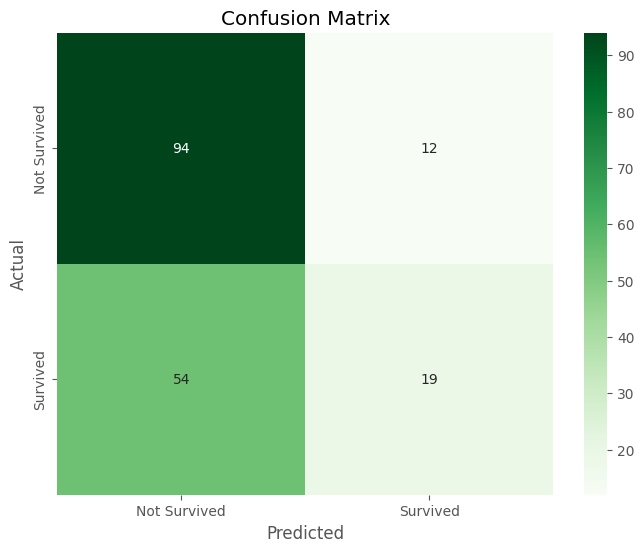

In [73]:
cm_forest = confusion_matrix(Y_test, y_forest)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_forest, annot=True, fmt="d", cmap="Greens", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [74]:
accu_forest = accuracy_score(Y_test, yhat_forest)
accu_forest

0.7150837988826816

In [75]:
from sklearn.metrics import f1_score, precision_score, recall_score

f1 = f1_score(Y_test, yhat_forest)
precision = precision_score(Y_test, yhat_forest)
recall = recall_score(Y_test, yhat_forest)

print("F1-Score: ",f1,' Precision: ',precision,' Recall: ',recall)

F1-Score:  0.6330935251798561  Precision:  0.6666666666666666  Recall:  0.6027397260273972


# Support Vector Machine 

In [76]:
from sklearn.svm import SVC

clf_svm = SVC(gamma='auto')
clf_svm.fit(X_train, Y_train)
yhat_svm = clf_svm.predict(X_test)
print("Accuracy for training data: ",accuracy_score(Y_test,yhat_svm))

Accuracy for training data:  0.6368715083798883


In [77]:
clf_SVM = SVC(gamma='auto')
clf_SVM.fit(X,Y)
pred_svm = clf_SVM.predict(X_test)
print("Accuracy for training data: ",accuracy_score(Y_test,pred_svm))

Accuracy for training data:  0.5921787709497207


/home/sinergia/.local/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [78]:
df_SVM = pd.DataFrame()
df_SVM['PassengerId'] = X_test['PassengerId']
df_SVM['Survived'] = yhat_svm
df_SVM

,PassengerId,Survived
862,863,0
223,224,0
84,85,0
680,681,0
535,536,0
...,...,...
796,797,0
815,816,0
629,630,0
421,422,0


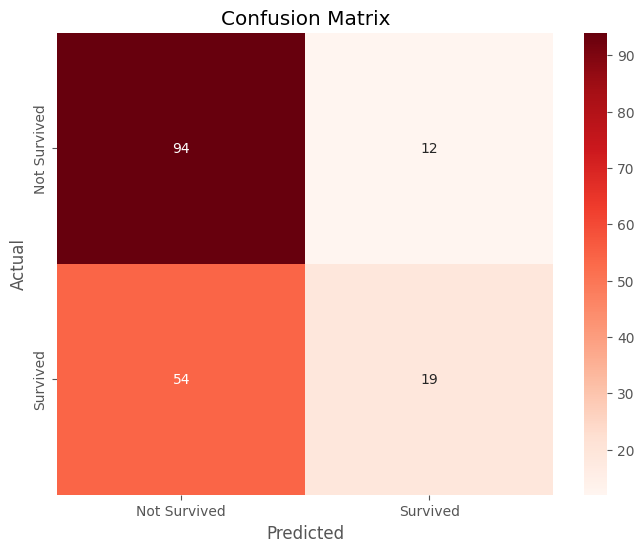

In [79]:
#Confusion Matrix

cm_svm = confusion_matrix(Y_test, y_forest)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Reds", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [80]:
accu_svm = accuracy_score(Y_test, yhat_svm)
accu_svm

0.6368715083798883

In [81]:
from sklearn.metrics import f1_score, precision_score, recall_score

f1 = f1_score(Y_test, yhat_svm)
precision = precision_score(Y_test, yhat_svm)
recall = recall_score(Y_test, yhat_svm)

print("F1-Score: ",f1,' Precision: ',precision,' Recall: ',recall)

F1-Score:  0.2857142857142857  Precision:  0.7222222222222222  Recall:  0.1780821917808219


# Naive Bayes Algorithm

In [82]:
from sklearn.naive_bayes import MultinomialNB

In [83]:
clf_naive = MultinomialNB()
clf_naive.fit(X_train, Y_train)
yhat_naive = clf_naive.predict(X_test)
print("Accuracy for training data : ",accuracy_score(Y_test,yhat_naive))

Accuracy for training data :  0.7206703910614525


In [84]:
clf_NB = MultinomialNB()
clf_NB.fit(X_train,Y_train)
pred_NB = clf_NB.predict(X_test)

df_NB = pd.DataFrame()
df_NB['PassengerId'] = X_test['PassengerId']
df_NB['Survival'] = pred_NB
df_NB

,PassengerId,Survival
862,863,1
223,224,0
84,85,1
680,681,0
535,536,1
...,...,...
796,797,1
815,816,0
629,630,0
421,422,0


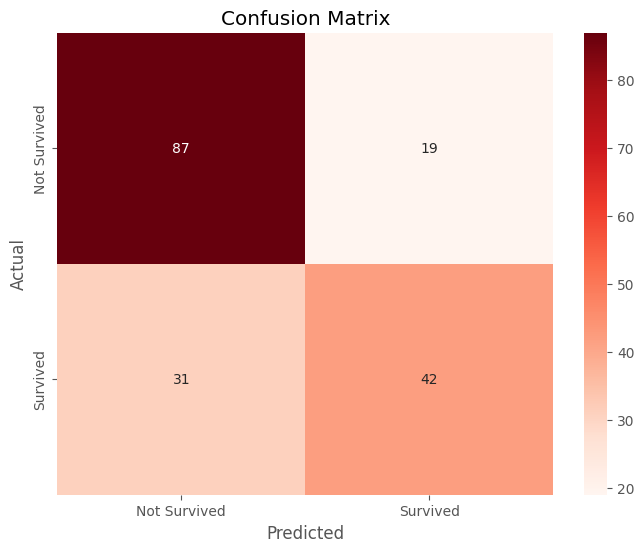

In [85]:
cm_nb = confusion_matrix(Y_test, pred_NB)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Reds", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [86]:
accu_nb = accuracy_score(Y_test, pred_NB)
accu_nb

0.7206703910614525

In [87]:
from sklearn.metrics import f1_score, precision_score, recall_score

f1 = f1_score(Y_test, yhat_naive)
precision = precision_score(Y_test, yhat_naive)
recall = recall_score(Y_test, yhat_naive)

print("F1-Score: ",f1,' Precision: ',precision,' Recall: ',recall)

F1-Score:  0.626865671641791  Precision:  0.6885245901639344  Recall:  0.5753424657534246


# Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression